In [1]:
import pandas as pd

file_path = "Australia_Macro_Data_Monthly.csv"

#Read the CSV
df = pd.read_csv(file_path)

#Convert Month column to datetime
df['Month'] = pd.to_datetime(df['Month'])

#Check first rows
print(df.head())

#Check structure and data types
print(df.info())
print(df.dtypes)


       Month  Cash_Rate_Target  House_Price_Index
0 2011-01-01              4.75               52.1
1 2011-02-01              4.75               55.2
2 2011-03-01              4.75               57.5
3 2011-04-01              4.75               59.6
4 2011-05-01              4.75               61.2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Month              181 non-null    datetime64[ns]
 1   Cash_Rate_Target   181 non-null    float64       
 2   House_Price_Index  181 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 4.4 KB
None
Month                datetime64[ns]
Cash_Rate_Target            float64
House_Price_Index           float64
dtype: object


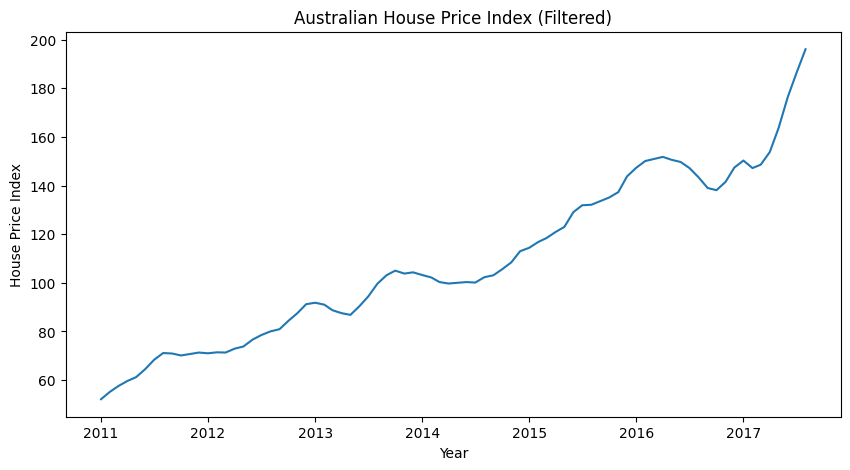

In [4]:
df_valid = df[df['House_Price_Index'].diff() != 0]

plt.figure(figsize=(10,5))
plt.plot(df_valid['Month'], df_valid['House_Price_Index'])
plt.title("Australian House Price Index (Filtered)")
plt.xlabel("Year")
plt.ylabel("House Price Index")
plt.show()


In [5]:
#Correlation Analysis
corr = df[['Cash_Rate_Target', 'House_Price_Index']].corr()
corr


,Cash_Rate_Target,House_Price_Index
Cash_Rate_Target,1.000000,-0.426659
House_Price_Index,-0.426659,1.000000


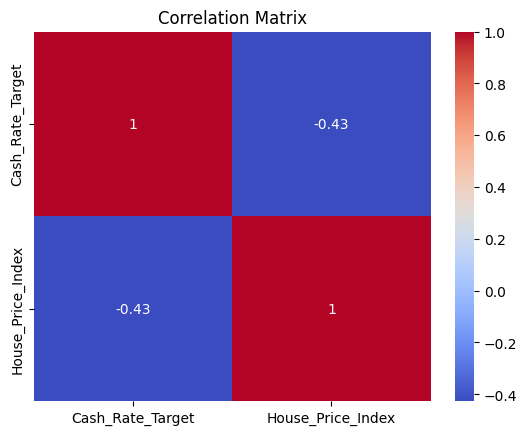

In [6]:
#Heatmap Visualization
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [8]:
#Linear Regression Model
from sklearn.linear_model import LinearRegression


In [9]:
#Prepare data for modeling
X = df[['Cash_Rate_Target']]
y = df['House_Price_Index']


In [11]:
#Train the model
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [12]:
#Model Parameters
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])


Intercept: 191.75483769850013
Coefficient: -14.270136244794415


In [14]:
#Predection Example
model.predict(pd.DataFrame({'Cash_Rate_Target': [4.0]}))


array([134.67429272])

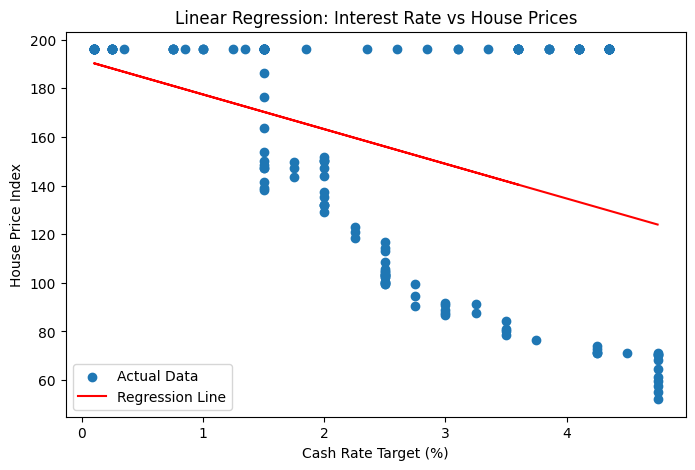

In [15]:
#Visual representation of Regression Line
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(X, y, label="Actual Data")
plt.plot(X, model.predict(X), color='red', label="Regression Line")
plt.xlabel("Cash Rate Target (%)")
plt.ylabel("House Price Index")
plt.title("Linear Regression: Interest Rate vs House Prices")
plt.legend()
plt.show()


In [16]:
#Time-Series Forecasting ARIMA
from statsmodels.tsa.arima.model import ARIMA


In [17]:
#Setting the time index
df_ts = df.set_index('Month')


In [22]:
#Training the ARIMA model
from statsmodels.tsa.arima.model import ARIMA

df_ts = df.set_index('Month')
df_ts = df_ts.asfreq('MS')   # MS = Month Start (monthly data)


arima_model = ARIMA(df_ts['House_Price_Index'], order=(1,1,1))
arima_result = arima_model.fit()


In [23]:
#Forecast next 12 months
forecast = arima_result.forecast(steps=12)
forecast


2026-02-01    196.1
2026-03-01    196.1
2026-04-01    196.1
2026-05-01    196.1
2026-06-01    196.1
2026-07-01    196.1
2026-08-01    196.1
2026-09-01    196.1
2026-10-01    196.1
2026-11-01    196.1
2026-12-01    196.1
2027-01-01    196.1
Freq: MS, Name: predicted_mean, dtype: float64

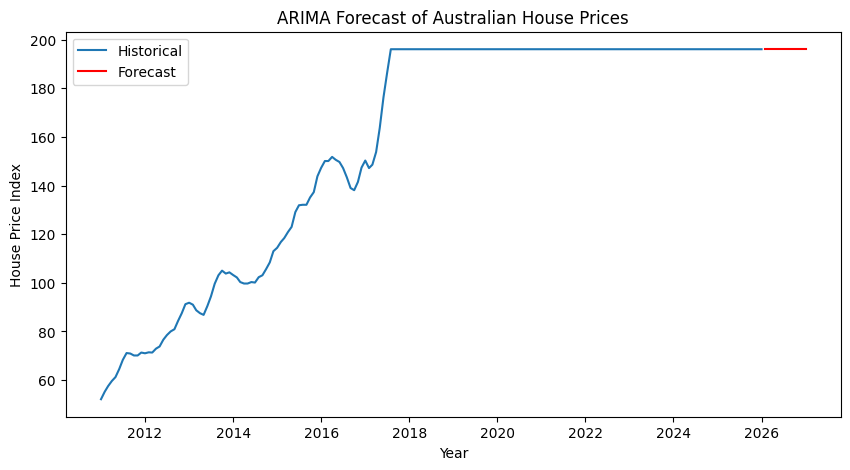

In [24]:
#Plotting the forecast
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(df_ts.index, df_ts['House_Price_Index'], label='Historical')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.xlabel("Year")
plt.ylabel("House Price Index")
plt.title("ARIMA Forecast of Australian House Prices")
plt.legend()
plt.show()
